In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/ramnathshreedhar/website/posts':
  os.chdir(r'/home/ramnathshreedhar/website/posts')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/tmp/ipykernel_4525/2114432925.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/lib/python3.9/importlib/_bootstrap.py": 1614531824.0, "/usr/lib/python3.9/importlib/_bootstrap_external.py": 1614531824.0, "/usr/lib/python3.9/codecs.py": 1614531824.0, "/usr/lib/python3.9/encodings/aliases.py": 1614531824.0, "/usr/lib/python3.9/encodings/__init__.py": 1614531824.0, "/usr/lib/python3.9/encodings/utf_8.py": 1614531824.0, "/usr/lib/python3.9/encodings/latin_1.py": 1614531824.0, "/usr/lib/python3.9/abc.py": 1614531824.0, "/usr/lib/python3.9/io.py": 1614531824.0, "/usr/lib/python3.9/stat.py": 1614531824.0, "/usr/lib/python3.9/_collections_abc.py": 1614531824.0, "/usr/lib/python3.9/genericpath.py": 1614531824.0, "/usr/lib/python3.9/posixpath.py": 1614531824.0, "/usr/lib/python3.9/os.py": 1614531824.0, "/usr/lib/python3.9/_sitebuiltins.py": 1614531824.0, "/usr/lib/python3.9/sitecustomize.py": 1614531824.0, "/usr/lib/python3.9/site.py": 1614531824.0, "/usr/lib/python3.9/types.py": 1614531824.0, "/usr/lib/python3.9/warnings.py": 1614531824.0, "/usr/lib/python3.9/importl

In [2]:
%%capture
import numpy as np
import wbgapi as wb
import pandas as pd
import opinionated
import matplotlib.pyplot as plt
from cycler import cycler
from opinionated.core import download_googlefont
from matplotlib.ticker import FuncFormatter

plt.style.use("opinionated_rc") 
download_googlefont('Atkinson Hyperlegible', add_to_cache=True);
plt.rc('font', family='Atkinson Hyperlegible')

def reformat(a,b):
  if a > 1000 or -1000:
    val = round(a/1000,1)
    new_tick = '${:.0f}K'.format(val)
    
  return new_tick

dollar = FuncFormatter(reformat)

plt.rc('axes', prop_cycle=(cycler('color', list(['#00308F','#007FFF','#6F00FF','#4C516D'])) *
                           cycler('linestyle', ['-', '--', ':', '-.'])))


In [3]:
df = wb.data.DataFrame('NY.GDP.PCAP.KD',['MUS',"SSF","SGP","USA","WLD","CHN","IND","KOR","HKG"],
time=range(1960, 2024, 1), labels=True,numericTimeKeys=True)


df.set_index('Country', inplace=True)

df = df.T

#df.plot(figsize=(8.75,4),fontsize=13)
#plt.yscale('log')
#plt.ylim(0,100000)
#plt.ylabel('Output per worker (Constant 2015 $)',fontsize=13)
#plt.xlabel('Date',fontsize=20)
#plt.legend(bbox_to_anchor=(1.35,0.5),fontsize=13)
#plt.gca().yaxis.set_major_formatter(dollar)
#plt.title('The convergence of different countries', x=1.32, fontsize=20,ha='right',fontweight='bold')
pd.concat([df.head(10), df.tail(10)]).map("${:,.0f}".format)

#plt.savefig('../posts/images/convergence.svg',bbox_inches='tight')

Country,"Hong Kong SAR, China","Korea, Rep.",India,China,World,United States,Singapore,Sub-Saharan Africa,Mauritius
1960,$nan,"$1,028",$306,$238,"$3,650","$18,992","$3,612","$1,139","$1,414"
1961,"$3,956","$1,067",$310,$175,"$3,744","$19,109","$3,777","$1,124","$1,726"
1962,"$4,334","$1,077",$312,$164,"$3,875","$19,965","$3,952","$1,163","$1,692"
1963,"$4,847","$1,142",$323,$176,"$3,985","$20,546","$4,240","$1,206","$1,877"
1964,"$5,140","$1,218",$339,$204,"$4,160","$21,438","$4,004","$1,235","$1,706"
1965,"$5,740","$1,274",$323,$233,"$4,303","$22,526","$4,215","$1,260","$1,722"
1966,"$5,791","$1,392",$316,$250,"$4,443","$23,715","$4,530","$1,253","$1,626"
1967,"$5,737","$1,483",$333,$230,"$4,516","$24,045","$4,985","$1,212","$1,665"
1968,"$5,807","$1,640",$337,$215,"$4,687","$24,948","$5,562","$1,218","$1,522"
1969,"$6,364","$1,836",$351,$244,"$4,865","$25,472","$6,237","$1,293","$1,570"


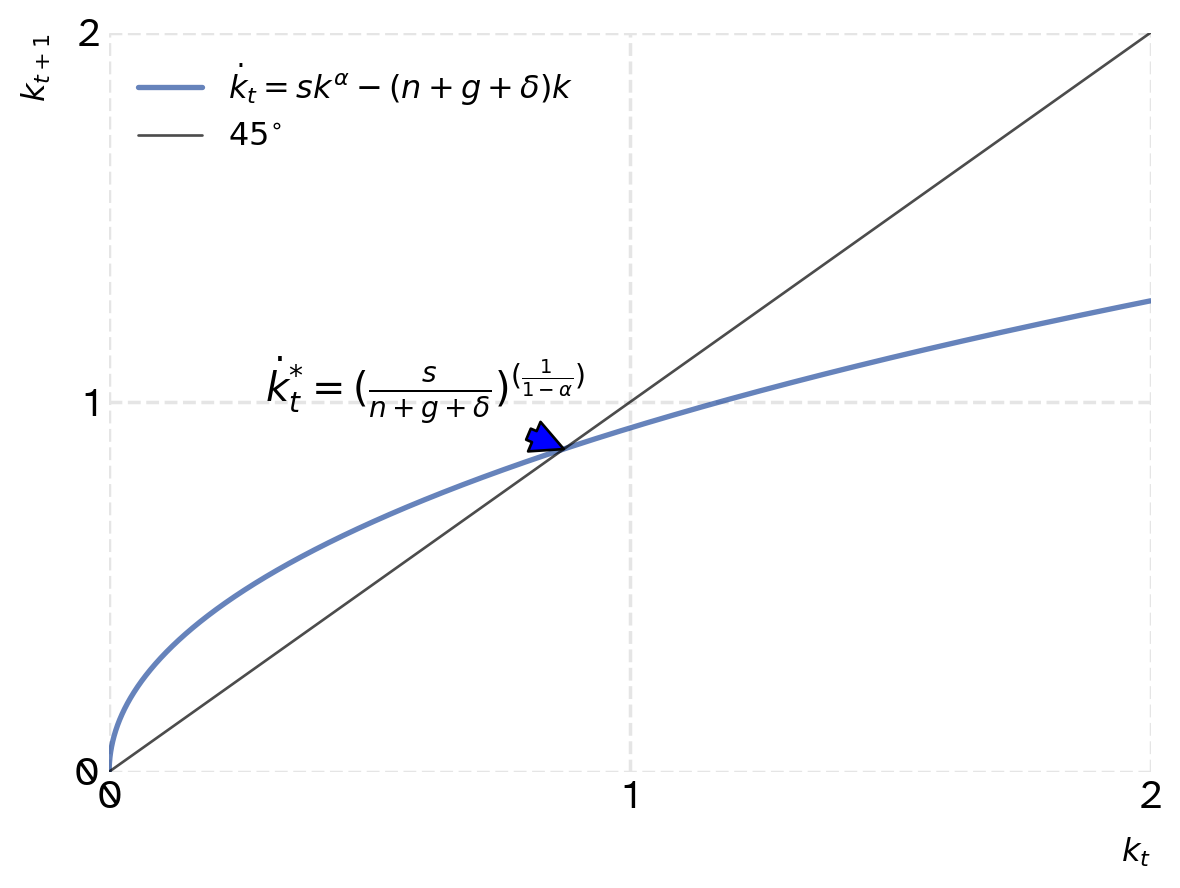

In [4]:
import matplotlib.pyplot as plt
import numpy as np

g, n, s, alpha, delta = 0.02 , 0.02, 1, 0.5, 0.03
x0 = 0.25
xmin, xmax = 0, 2

def graph(g, n, s, alpha, delta, k):
    return  s * k**alpha - (n+g+delta) * k

def plot45():
    xgrid = np.linspace(xmin, xmax, 12000)

    fig, ax = plt.subplots()

    ax.set_xlim(xmin, xmax)

    graph_values = graph(g, n, s, alpha, delta, xgrid)

    ymin, ymax = np.min(graph_values), np.max(graph_values)
    ax.set_ylim(ymin, ymax)

    lb = r'$\dot{k}_{t} = sk^{\alpha} - (n+g+\delta)k$'
    ax.plot(xgrid, graph_values,  lw=2, alpha=0.6, label=lb)
    ax.plot(xgrid, xgrid, 'k-', lw=1, alpha=0.7, label='$45^{\circ}$')

    ax.legend(loc='upper left', frameon=False, fontsize=12)

    circle_rad = 30
    ax.set_xticks((0, 1, 2))
    ax.set_yticks((0, 1, 2))
    ax.annotate(r'$\dot{k}^{*}_{t} = (\frac{s}{ n + g + \delta })^{(\frac{1}{1-\alpha})}$',
     xy=(0.873, 0.873), xytext=(0.3, 1), arrowprops=dict(
                arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                facecolor='b', shrinkB=circle_rad * 1.2),fontsize=15)
    ax.set_xlabel('$k_t$', fontsize=12)
    ax.set_ylabel('$k_{t+1}$', fontsize=12)

    plt.show()


plot45()


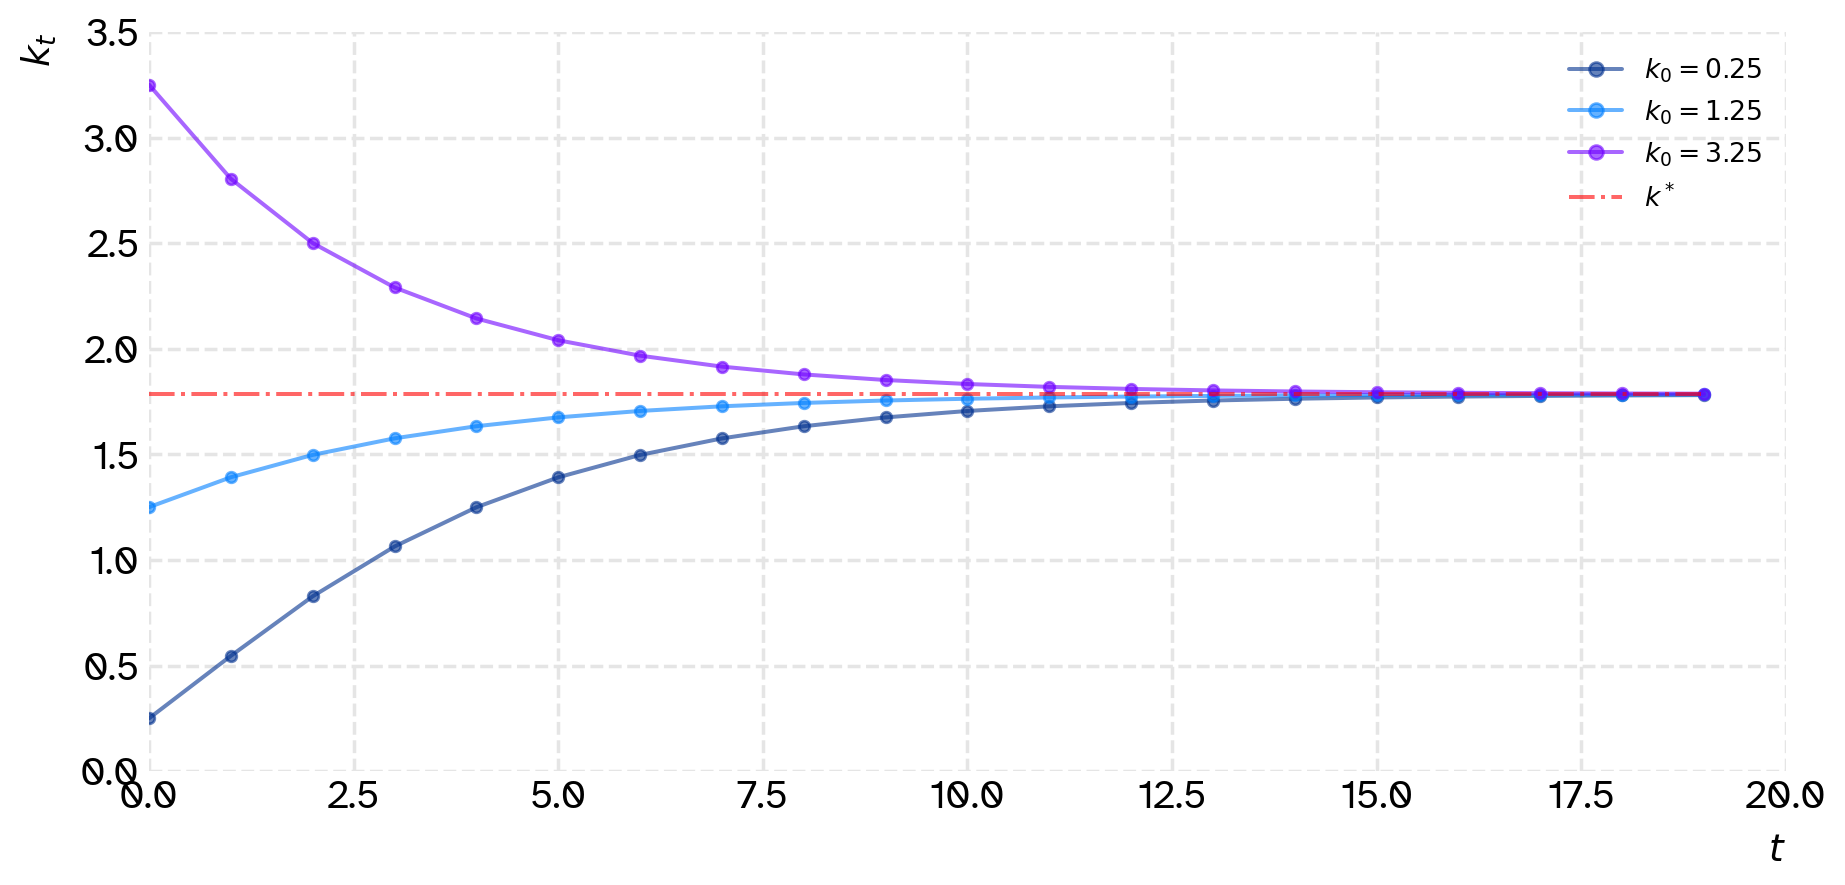

In [5]:
plt.rc('axes', prop_cycle=(cycler('color', list(['#00308F','#007FFF','#6F00FF','#4C516D'])) +
                           cycler('linestyle', ['-', '--', ':', '-.'])))

# Yes this is a different production function but the graph is what matters here, I did it correctly  for the first graph and it is a pain to get right. These are irrelevant in so far as understanding what is going on, look at the image for revelant information.
def g(A, s, alpha, delta, k):
    return A * s * k**alpha + (1 - delta) * k

A, s, alpha, delta = 2, 0.3, 0.3, 0.4
x0 = np.array([.25, 1.25, 3.25])

ts_length = 20
xmin, xmax = 0, ts_length
ymin, ymax = 0, 3.5
def simulate_ts(x0_values, ts_length):

    k_star = (s * A / delta)**(1/(1-alpha))
    fig, ax = plt.subplots(figsize=[11, 5])
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    ts = np.zeros(ts_length)

    # simulate and plot time series
    for x_init in x0_values:
        ts[0] = x_init
        for t in range(1, ts_length):
            ts[t] = g(A, s, alpha, delta, ts[t-1])
        ax.plot(np.arange(ts_length), ts, '-o', ms=4, alpha=0.6,
                label=r'$k_0=%g$' %x_init)
    ax.plot(np.arange(ts_length), np.full(ts_length,k_star),
            alpha=0.6, color='red', label=r'$k^*$')
    ax.legend(fontsize=10,loc='upper right')

    ax.set_xlabel(r'$t$', fontsize=14)
    ax.set_ylabel(r'$k_t$', fontsize=14)

    plt.show()
simulate_ts(x0, ts_length)

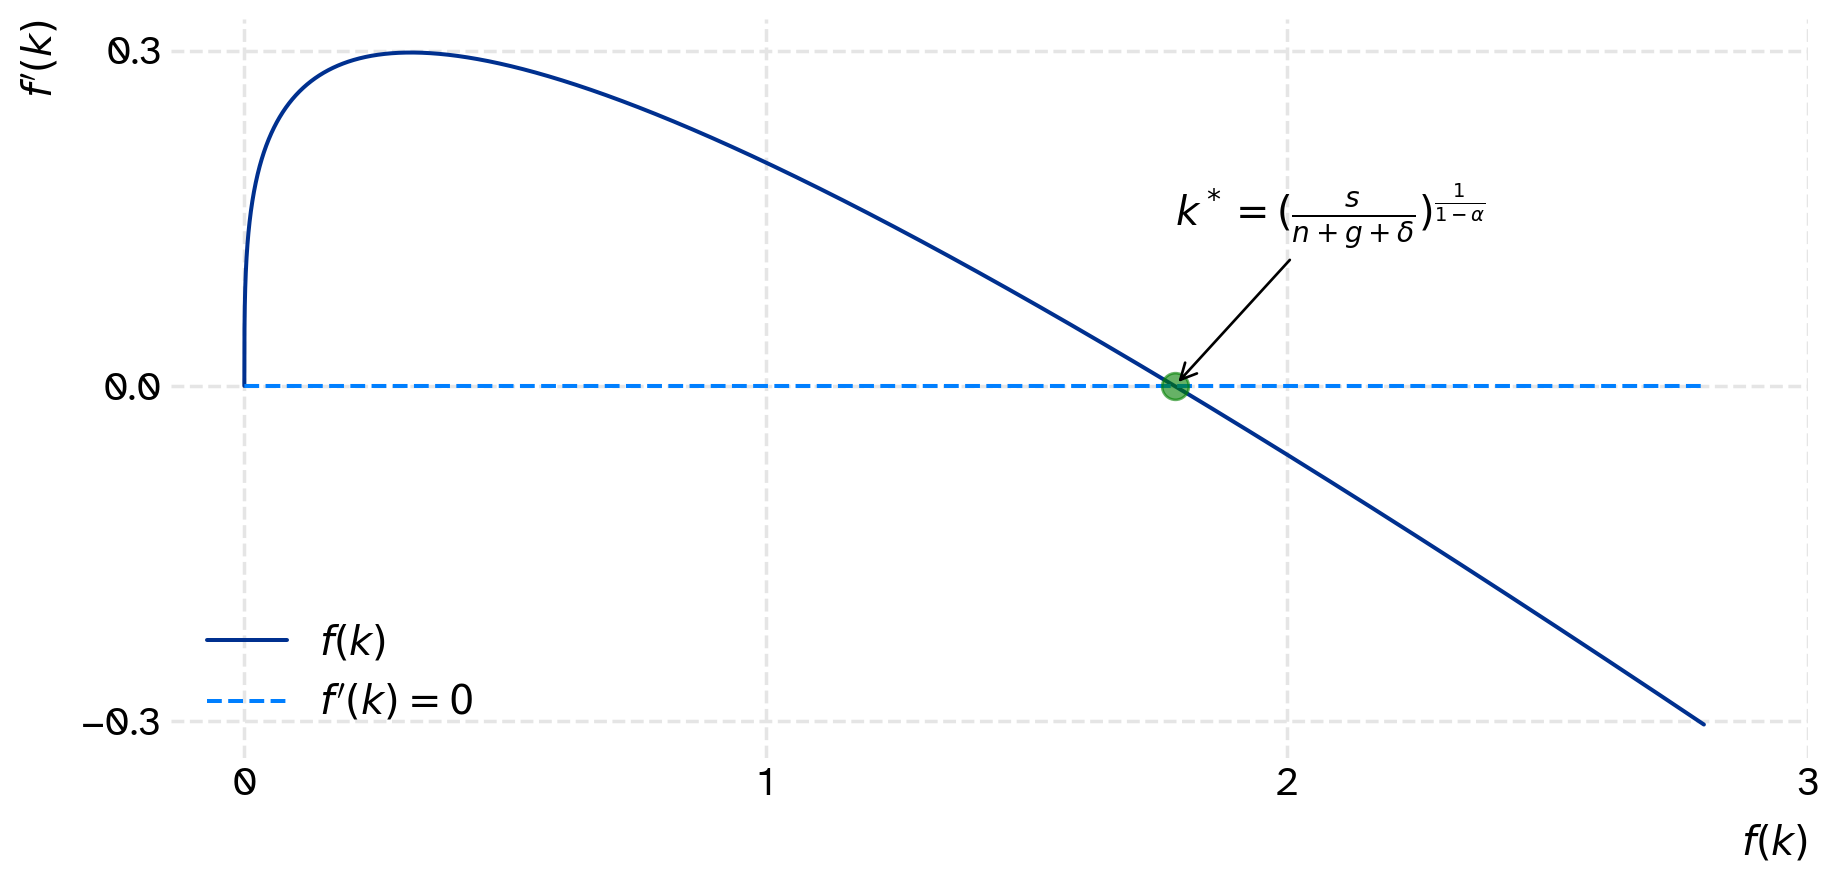

In [6]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4

# Yes this is a different production function but the graph is what matters here, I did it correctly for the first graph and it is a pain to get right. These are irrelevant in so far as understanding what is going on, look at the image for revelant information.
def g_con(A, s, alpha, delta, k):
    return A * s * k**alpha - delta * k
def plot_gcon(kstar=None):

    k_grid = np.linspace(0, 2.8, 10000)

    fig, ax = plt.subplots(figsize=[11, 5])
    ax.plot(k_grid, g_con(A, s, alpha, delta, k_grid), label='$f(k)$')
    ax.plot(k_grid, 0 * k_grid, label="$f'(k)=0$")

    if kstar:
        fps = (kstar,)

        ax.plot(fps, 0, 'go', ms=10, alpha=0.6)


        ax.annotate(r'$k^* = (\frac{s}{ n+g+\delta})^{\frac{1}{1-\alpha}}$',
                 xy=(kstar, 0),
                 xycoords='data',
                 xytext=(0, 60),
                 textcoords='offset points',
                 fontsize=15,
                 arrowprops=dict(arrowstyle="->"))

    ax.legend(loc='lower left', fontsize=15)

    ax.set_xlabel("$f(k)$",fontsize=15)
    ax.set_ylabel("$f'(k)$", fontsize=15)

    ax.set_xticks((0, 1, 2, 3))
    ax.set_yticks((-0.3, 0, 0.3))

    plt.show()
kstar = ((s * A) / delta)**(1/(1 - alpha))
plot_gcon(kstar)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px


sns.set_context('notebook',font_scale=1)
sns.set_style('ticks')


class Solow:
    
    """ 
    Built upon and modified from Stachurski-Sargeant and Brad Delong 
    <https://lectures.quantecon.org/py/python_oop.html>

    """
    
    def __init__(self, n=0.02,              # population growth rate
                       s=0.3,              # savings rate
                       δ=0.03,              # depreciation rate
                       α=1/3,               # share of capital
                       g=0.02,              # productivity
                       κ=1, # current capital-labor ratio
                       A=1,               # current efficiency of labor
                       L=1.0,
                       upper=0,
                       lower=0,
                                ):              # current labor force  

        self.n, self.s, self.δ, self.α, self.g = n, s, δ, α, g
        self.κ, self.A, self.L, self.upper, self.lower = κ, A, L, upper,lower
        self.f = np.random.uniform(self.lower,high=self.upper)
        self.Y = self.κ**(self.α/(1-self.α))*self.A*self.L
        self.K = self.κ * self.Y
        self.y = self.Y/self.L
        self.g_k = ((self.s+self.f)*(1/self.κ)**(1-self.α) - self.δ)
        self.g_y = self.α*(self.g_k-self.g-self.n)+self.g
        self.MPK = self.α*(self.Y/self.K)
        self.ts = self.s + self.f
        self.initdata = vars(self).copy()
        
    
    
    def calc_next_period_kappa(self):
        "Calculate the next period capital-output ratio."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, g, κ, f = self.n, self.s, self.δ, self.α, self.g, self.κ, self.f
        # Apply the update rule
        return (κ + (1 - α)*( (s+f) - (n+g+δ)*κ ))

    def calc_next_period_A(self):
        "Calculate the next period efficiency of labor."
        # Unpack parameters (get rid of self to simplify notation)
        A, g = self.A, self.g
        # Apply the update rule
        return (A*np.exp(g))


    def calc_next_period_L(self):
        "Calculate the next period labor force."
        # Unpack parameters (get rid of self to simplify notation)
        n, L = self.n, self.L
        # Apply the update rule
        return (L*np.exp(n))
    

        
    def update(self):
        "Update the current state."
        self.f = np.random.uniform(self.lower,high=self.upper)
        self.κ =  self.calc_next_period_kappa()
        self.A =  self.calc_next_period_A()
        self.L =  self.calc_next_period_L()
        self.Y = self.κ**(self.α/(1-self.α))*self.A*self.L
        self.K = self.κ * self.Y
        self.y = self.Y/self.L
        self.k = self.K/self.L
        self.g_k = ((self.s+self.f)*(1/self.κ)**(1-self.α) - self.δ)
        self.g_y = self.α*(self.g_k-self.g-self.n)+self.g
        self.MPK = self.α*(self.Y/self.K)
        self.ts = self.s + self.f

    def generate_sequence(self, t, var = 'κ', init = True):
        "Generate and return time series of selected variable. Variable is κ by default. Start from t=0 by default."
        path = []
        
        # initialize data 
        if init == True:
            for para in self.initdata:
                 setattr(self, para, self.initdata[para])

        for i in range(t):
            path.append(vars(self)[var])
            self.update()
        return path

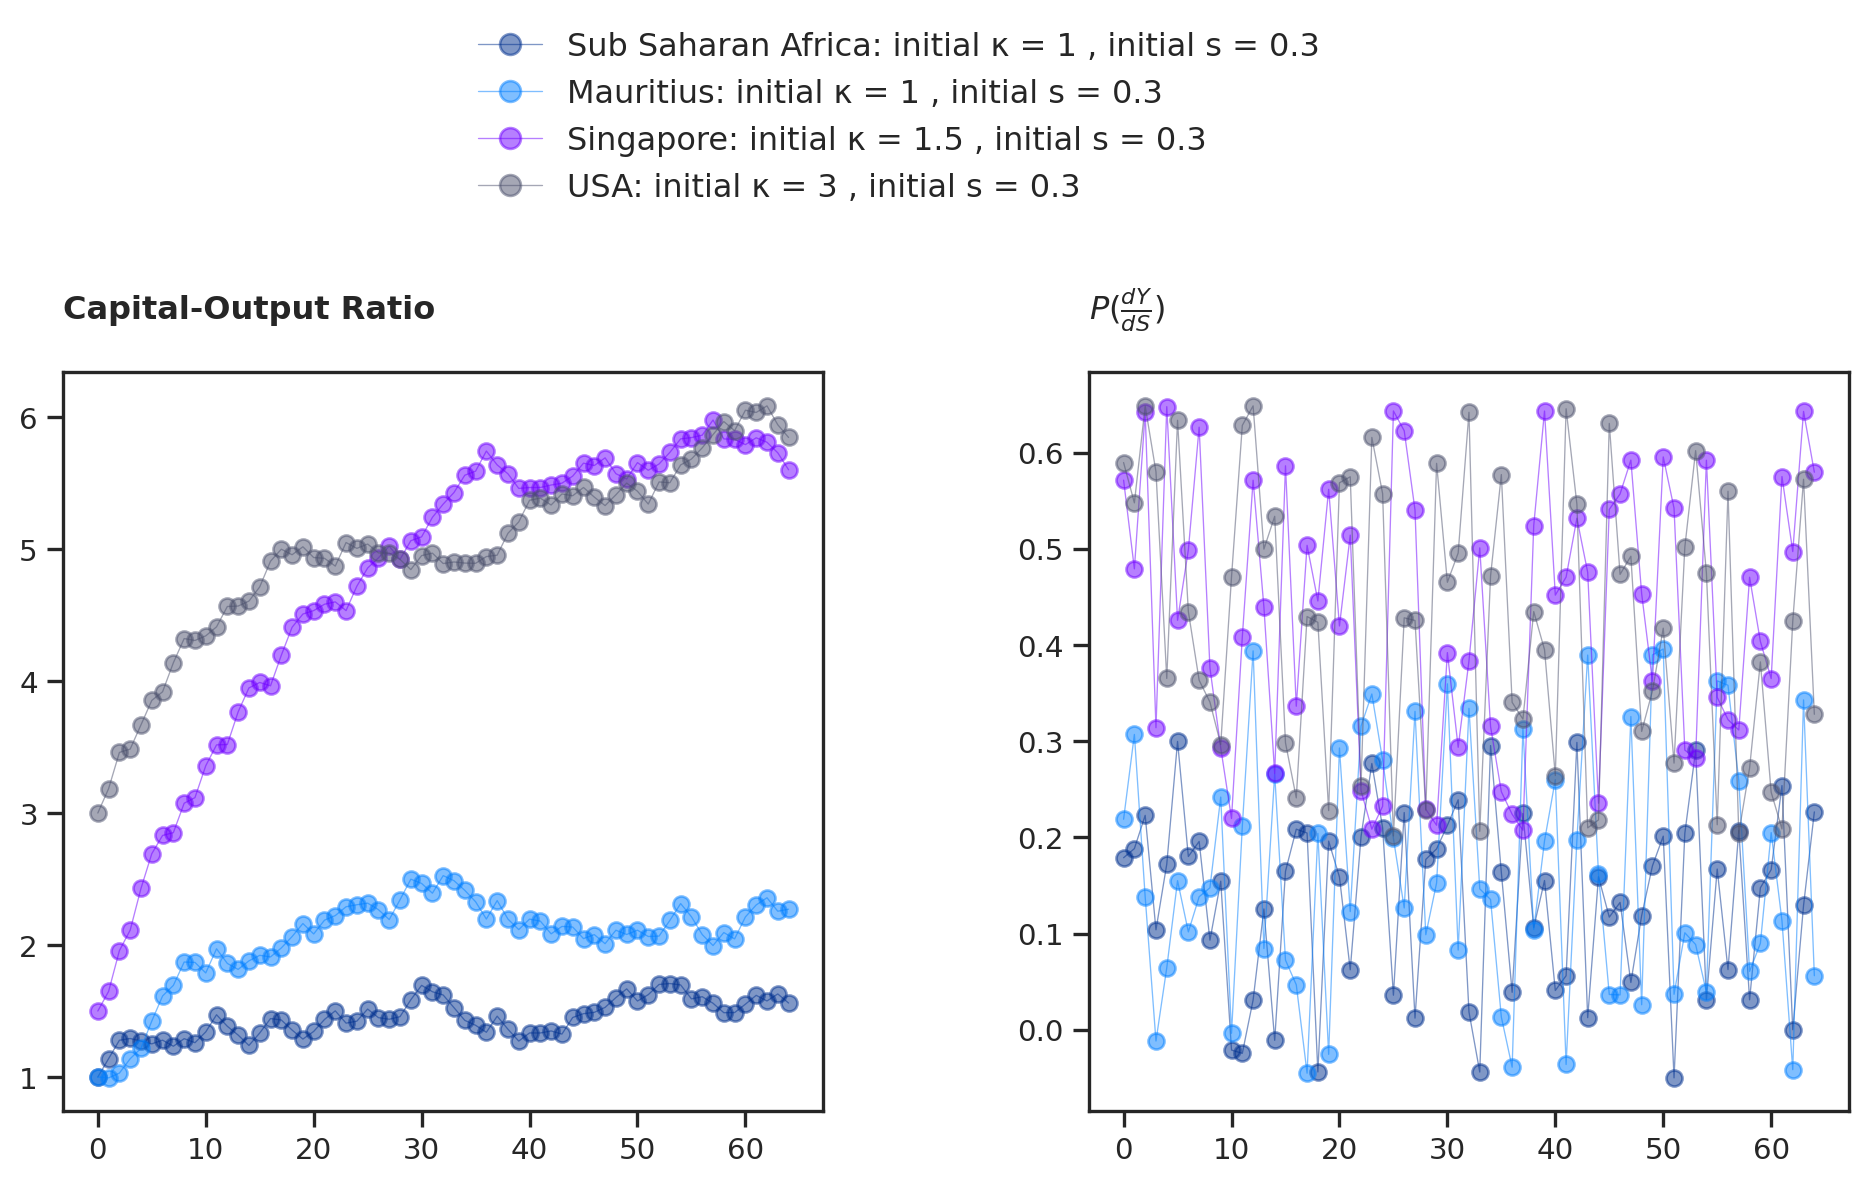

In [8]:
T = 65

s_base = Solow(κ=1,s=0.3,upper=0,lower=-0.35,A=1139)
s_base.scenario = "Sub Saharan Africa"
s_alt = Solow(κ=1,s=0.3,upper=0.1,lower=-0.35,A=1414)
s_alt.scenario = "Mauritius"
s_sin = Solow(κ=1.5,s=0.3,upper=0.35,lower=-0.1,A=2408)
s_sin.scenario = "Singapore"
s_usa = Solow(κ=3,s=0.3,upper=0.35,lower=-0.1,A=6330)
s_usa.scenario = "USA"

indicators = [('g_y'),('κ'),('y'),('K'),('ts')]

figcontents = {
        (0,0):('κ',r'Capital-Output Ratio'),
        (0,1):('ts',r'$P(\frac{dY}{dS})$'),
      
       }

fig, axes = plt.subplots(1, 2, figsize=(12,5))
for s in s_base,s_alt,s_sin,s_usa:
        lb = f'{s.scenario}: initial κ = {s.initdata["κ"]} , initial s = {s.initdata["s"]}'
        axes[0].plot(s.generate_sequence(T, var = figcontents[0,0][0]),'o-', lw=0.5, alpha=0.5, label=lb)
        axes[1].plot(s.generate_sequence(T, var = figcontents[0,1][0]),'o-', lw=0.5, alpha=0.5, label=lb)
        axes[0].set(title=figcontents[0,0][1])
        axes[1].set(title=figcontents[0,1][1])


#   global legend
axes[0].legend(loc='upper center', bbox_to_anchor=(1.1,1.5),fontsize=12)
plt.subplots_adjust(wspace=0.35)
plt.show()

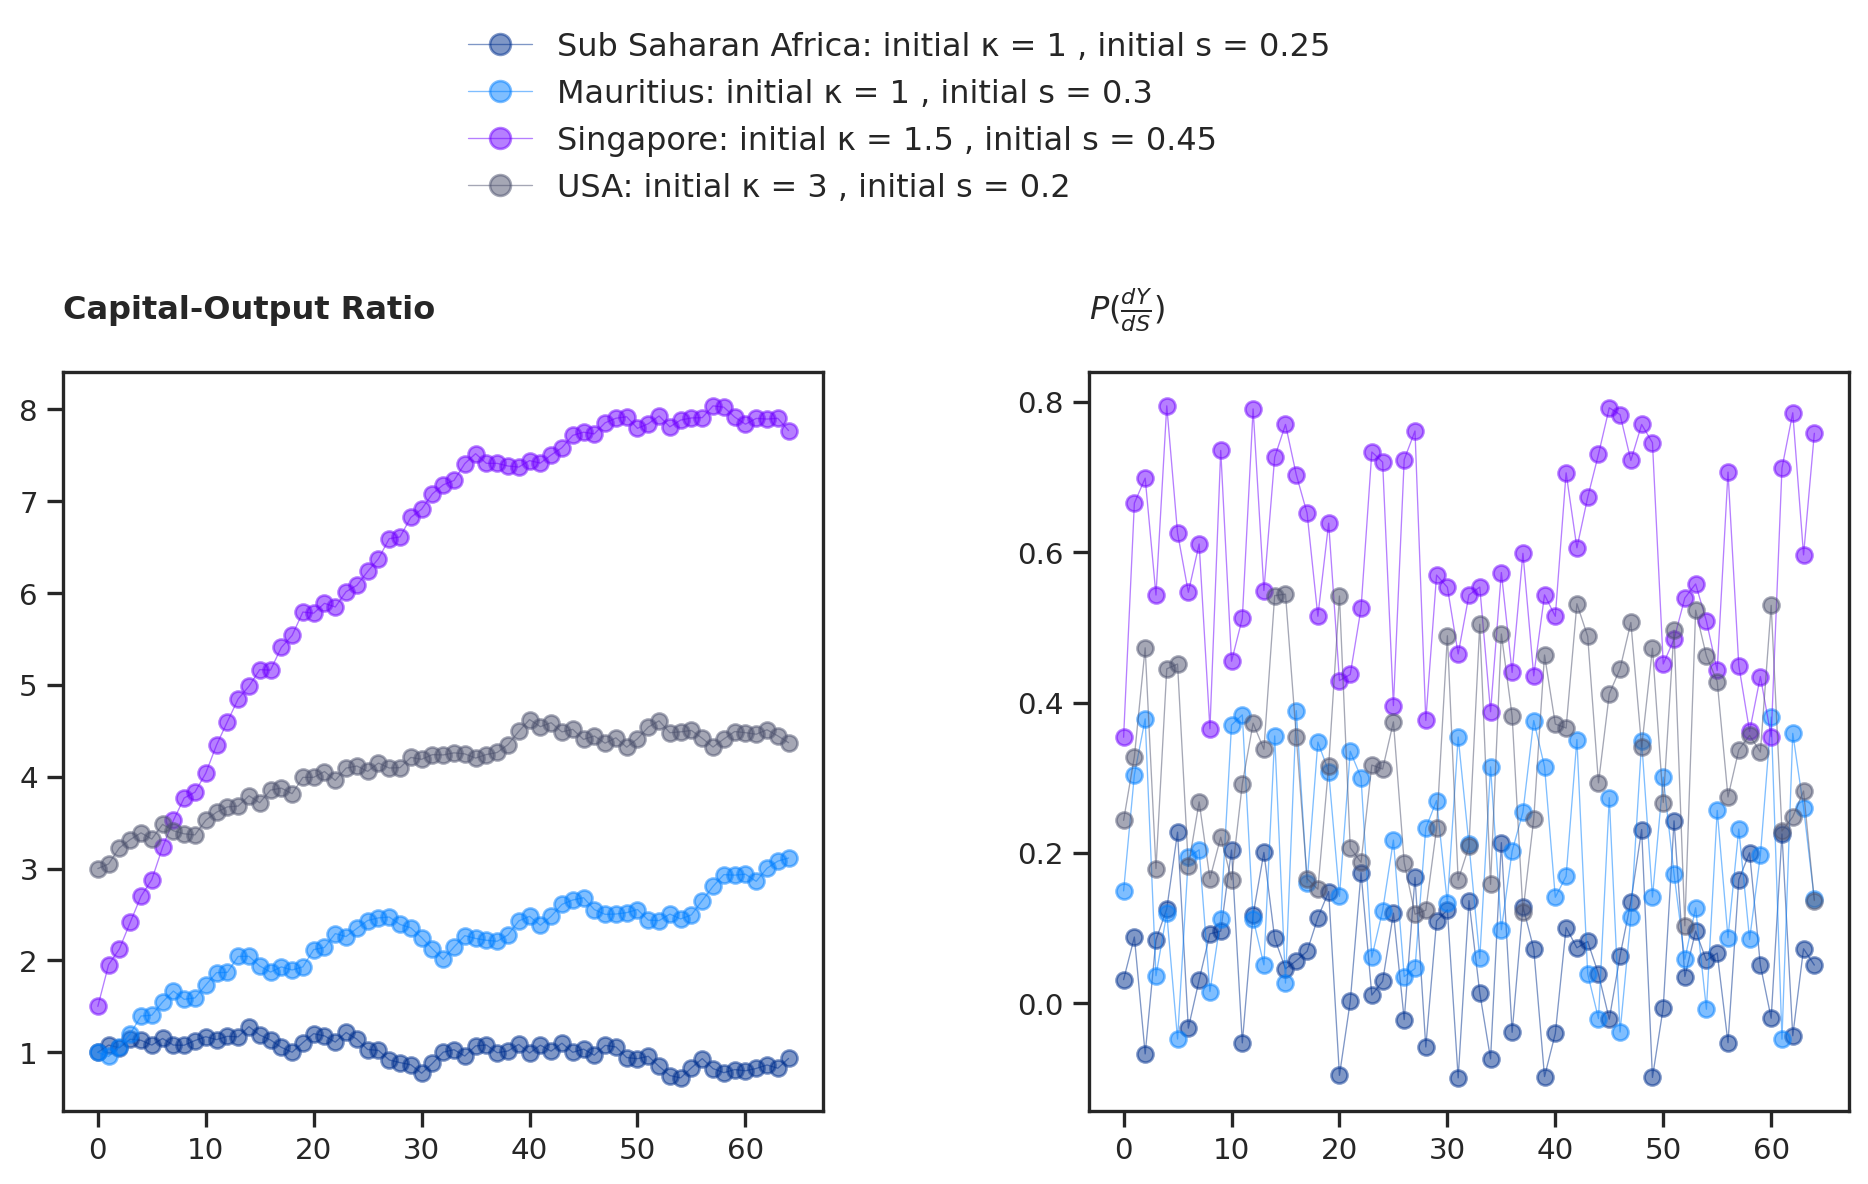

In [9]:
T = 65

s_base1 = Solow(κ=1,s=0.25,upper=0,lower=-0.35,A=1139)
s_base1.scenario = "Sub Saharan Africa"
s_alt1 = Solow(κ=1,s=0.3,upper=0.1,lower=-0.35,A=1414,n=0.01)
s_alt1.scenario = "Mauritius"
s_sin1 = Solow(κ=1.5,s=0.45,upper=0.35,lower=-0.1,A=2408)
s_sin1.scenario = "Singapore"
s_usa1 = Solow(κ=3,s=0.2,upper=0.35,lower=-0.1,A=6330)
s_usa1.scenario = "USA"

figcontents = {
        (0,0):('κ',r'Capital-Output Ratio'),
        (0,1):('ts',r'$P(\frac{dY}{dS})$'),
      
       }

fig, axes = plt.subplots(1, 2, figsize=(12,5))
for s in s_base1,s_alt1,s_sin1,s_usa1:
        lb = f'{s.scenario}: initial κ = {s.initdata["κ"]} , initial s = {s.initdata["s"]}'
        axes[0].plot(s.generate_sequence(T, var = figcontents[0,0][0]),'o-', lw=0.5, alpha=0.5, label=lb)
        axes[1].plot(s.generate_sequence(T, var = figcontents[0,1][0]),'o-', lw=0.5, alpha=0.5, label=lb)
        axes[0].set(title=figcontents[0,0][1])
        axes[1].set(title=figcontents[0,1][1])


#   global legend
axes[0].legend(loc='upper center', bbox_to_anchor=(1.1,1.5),fontsize=12)
plt.subplots_adjust(wspace=0.35)
plt.show()

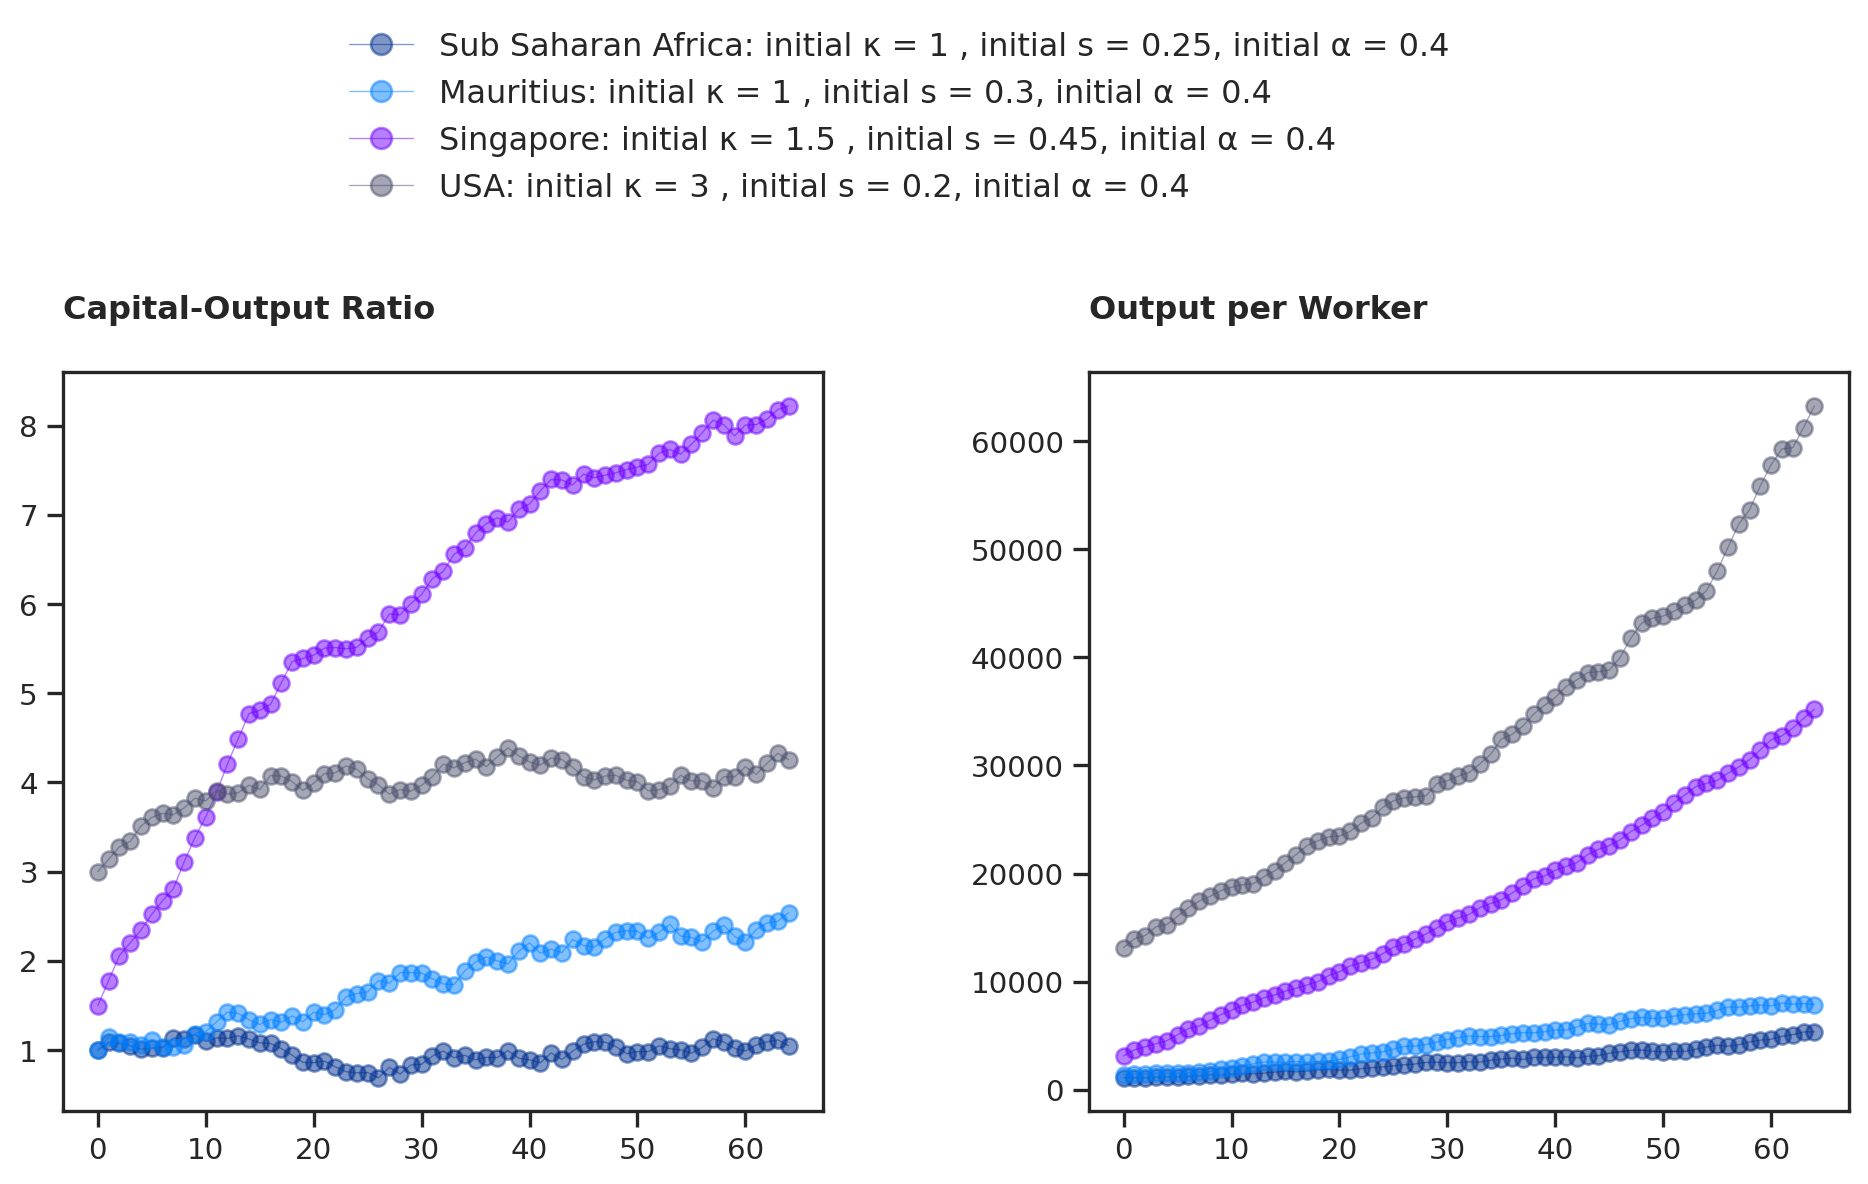

In [10]:
T = 65

s_base2 = Solow(κ=1,s=0.25,upper=0,lower=-0.35,A=1139,α=0.4)
s_base2.scenario = "Sub Saharan Africa"
s_alt2 = Solow(κ=1,s=0.3,upper=0.1,lower=-0.35,A=1414,α=0.4)
s_alt2.scenario = "Mauritius"
s_sin2 = Solow(κ=1.5,s=0.45,upper=0.35,lower=-0.1,A=2408,α=0.4)
s_sin2.scenario = "Singapore"
s_usa2 = Solow(κ=3,s=0.2,upper=0.35,lower=-0.1,A=6330,α=0.4)
s_usa2.scenario = "USA"



figcontents = {
        (0,0):('κ',r'Capital-Output Ratio'),
        (0,1):('y',r'Output per Worker'),
      
       }

fig, axes = plt.subplots(1, 2, figsize=(12,5))
for s in s_base2,s_alt2,s_sin2,s_usa2:
        lb = f'{s.scenario}: initial κ = {s.initdata["κ"]} , initial s = {s.initdata["s"]}, initial α = {s.initdata["α"]}'
        axes[0].plot(s.generate_sequence(T, var = figcontents[0,0][0]),'o-', lw=0.5, alpha=0.5, label=lb)
        axes[1].plot(s.generate_sequence(T, var = figcontents[0,1][0]),'o-', lw=0.5, alpha=0.5, label=lb)
        axes[0].set(title=figcontents[0,0][1])
        axes[1].set(title=figcontents[0,1][1])


#   global legend
axes[0].legend(loc='upper center', bbox_to_anchor=(1.1,1.5),fontsize=12)
plt.subplots_adjust(wspace=0.35)
plt.show()

In [11]:
T = 65

s_base = Solow(κ=2.5,s=0.25,upper=0,lower=-0.35,A=372,α=0.55,L=210,n=0.027)
s_base.scenario = "Sub Saharan Africa"
s_alt = Solow(κ=1.75,s=0.3,upper=0.1,lower=-0.35,A=714,α=0.55,L=0.6,n=0.013)
s_alt.scenario = "Mauritius"
s_sin = Solow(κ=2,s=0.45,upper=0.35,lower=-0.1,A=1549,α=0.55,L=1.52)
s_sin.scenario = "Singapore"
s_usa = Solow(κ=6,s=0.2,upper=0.35,lower=-0.1,A=7754,L=166,n=0.011)
s_usa.scenario = "USA"
s_ind = Solow(κ=1.7,s=0.3,upper=0.1,lower=-0.35,A=160,α=0.55,L=411,n=0.018)
s_ind.scenario = "India"
s_hkg = Solow(κ=2,s=0.2,upper=0.35,lower=0,A=1650,α=0.55,L=2.8,n=0.014)
s_hkg.scenario = "Hong Kong"
s_skr = Solow(κ=1.4,s=0.4,upper=0.35,lower=-0.1,A=682,α=0.55,L=23,n=0.014)
s_skr.scenario = "South-Korea"
s_cn = Solow(κ=1.4,s=0.45,upper=0.35,lower=0,A=158,α=0.55,L=615,n=0.015)
s_cn.scenario = "China"

indicators = [('y'),('κ'),('Y'),('MPK'),('g_y'),('ts')]

In [12]:
fig = make_subplots(rows=3, cols=2,
                    specs=[[{"secondary_y": True}, {"secondary_y": True}],[{"secondary_y": True}, {"secondary_y": True}],[{"secondary_y": True}, {"secondary_y": True}]])
                    
ga_row=3
ga_cols=2
     
titles = [('y (USD)'),('KY Ratio'),('Output (Million USD)'),('MPK'),('$G^{y}$'),('$P(\cfrac{dS}{dY})$'),]

x=0
for i in range(1, ga_row + 1):
    for j in range(1, ga_cols + 1):  
        for s in s_alt,:
                fig.add_trace(go.Scatter(y=s.generate_sequence(T,var=indicators[x]), mode='lines'),row=i,col=j)
                x=x+1
                
    fig.update_layout(title_text=f'{s.scenario}: initial κ = {s.initdata["κ"]} , initial s = {s.initdata["s"]}, initial g = {s.initdata["g"]}, initial L = {s.initdata["L"]}, <br> initial n = {s.initdata["n"]}, initial A = {s.initdata["A"]}, initial α = {s.initdata["α"]} ')

tt = 0
for i in range(1, ga_row + 1):
    for j in range(1, ga_cols + 1): 
        fig.update_yaxes(title_text=titles[tt], row=i, col=j)
        tt = tt+1
fig.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
)

fig.show()

In [13]:
fig2 = make_subplots(rows=3, cols=2,
                    specs=[[{"secondary_y": True}, {"secondary_y": True}],[{"secondary_y": True}, {"secondary_y": True}],[{"secondary_y": True}, {"secondary_y": True}]])


x=0
for i in range(1, ga_row + 1):
    for j in range(1, ga_cols + 1):  
        for s in s_usa,:
                fig2.add_trace(go.Scatter(y=s.generate_sequence(T,var=indicators[x]), mode='lines'),row=i,col=j)
                x=x+1
    fig2.update_layout(title_text=f'{s.scenario}: initial κ = {s.initdata["κ"]} , initial s = {s.initdata["s"]}, initial g = {s.initdata["g"]}, initial L = {s.initdata["L"]}, <br> initial n = {s.initdata["n"]}, initial A = {s.initdata["A"]}, initial α = {s.initdata["α"]} ')

tt = 0
for i in range(1, ga_row + 1):
    for j in range(1, ga_cols + 1): 
        fig2.update_yaxes(title_text=titles[tt], row=i, col=j)
        tt = tt+1
fig2.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
)

fig2.show()


In [14]:
fig3 = make_subplots(rows=3, cols=2,
                    specs=[[{"secondary_y": True}, {"secondary_y": True}],[{"secondary_y": True}, {"secondary_y": True}],[{"secondary_y": True}, {"secondary_y": True}]])


x=0
for i in range(1, ga_row + 1):
    for j in range(1, ga_cols + 1):  
        for s in s_base,:
                fig3.add_trace(go.Scatter(y=s.generate_sequence(T,var=indicators[x]), mode='lines'),row=i,col=j)
                x=x+1
    fig3.update_layout(title_text=f'{s.scenario}: initial κ = {s.initdata["κ"]} , initial s = {s.initdata["s"]}, initial g = {s.initdata["g"]}, initial L = {s.initdata["L"]}, <br> initial n = {s.initdata["n"]}, initial A = {s.initdata["A"]}, initial α = {s.initdata["α"]} ')

tt = 0
for i in range(1, ga_row + 1):
    for j in range(1, ga_cols + 1): 
        fig3.update_yaxes(title_text=titles[tt], row=i, col=j)
        tt = tt+1
fig3.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
)
fig3.show()

In [15]:
fig4 = make_subplots(rows=3, cols=2,
                    specs=[[{"secondary_y": True}, {"secondary_y": True}],[{"secondary_y": True}, {"secondary_y": True}],[{"secondary_y": True}, {"secondary_y": True}]])


x=0
for i in range(1, ga_row + 1):
    for j in range(1, ga_cols + 1):  
        for s in s_sin,:
                fig4.add_trace(go.Scatter(y=s.generate_sequence(T,var=indicators[x]), mode='lines'),row=i,col=j)
                x=x+1
    fig4.update_layout(title_text=f'{s.scenario}: initial κ = {s.initdata["κ"]} , initial s = {s.initdata["s"]}, initial g = {s.initdata["g"]}, initial L = {s.initdata["L"]}, <br> initial n = {s.initdata["n"]}, initial A = {s.initdata["A"]}, initial α = {s.initdata["α"]} ')

tt = 0
for i in range(1, ga_row + 1):
    for j in range(1, ga_cols + 1): 
        fig4.update_yaxes(title_text=titles[tt], row=i, col=j)
        tt = tt+1
fig4.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
)

fig4.show()

In [16]:
fig5 = make_subplots(rows=3, cols=2,
                    specs=[[{"secondary_y": True}, {"secondary_y": True}],[{"secondary_y": True}, {"secondary_y": True}],[{"secondary_y": True}, {"secondary_y": True}]])


x=0
for i in range(1, ga_row + 1):
    for j in range(1, ga_cols + 1):  
        for s in s_ind,:
                fig5.add_trace(go.Scatter(y=s.generate_sequence(T,var=indicators[x]), mode='lines'),row=i,col=j)
                x=x+1
    fig5.update_layout(title_text=f'{s.scenario}: initial κ = {s.initdata["κ"]} , initial s = {s.initdata["s"]}, initial g = {s.initdata["g"]}, initial L = {s.initdata["L"]}, <br> initial n = {s.initdata["n"]}, initial A = {s.initdata["A"]}, initial α = {s.initdata["α"]} ')

tt = 0
for i in range(1, ga_row + 1):
    for j in range(1, ga_cols + 1): 
        fig5.update_yaxes(title_text=titles[tt], row=i, col=j)
        tt = tt+1
fig5.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
)

fig5.show()

In [17]:
fig6 = make_subplots(rows=3, cols=2,
                    specs=[[{"secondary_y": True}, {"secondary_y": True}],[{"secondary_y": True}, {"secondary_y": True}],[{"secondary_y": True}, {"secondary_y": True}]])


x=0
for i in range(1, ga_row + 1):
    for j in range(1, ga_cols + 1):  
        for s in s_hkg,:
                fig6.add_trace(go.Scatter(y=s.generate_sequence(T,var=indicators[x]), mode='lines'),row=i,col=j)
                x=x+1
    fig6.update_layout(title_text=f'{s.scenario}: initial κ = {s.initdata["κ"]} , initial s = {s.initdata["s"]}, initial g = {s.initdata["g"]}, initial L = {s.initdata["L"]}, <br> initial n = {s.initdata["n"]}, initial A = {s.initdata["A"]}, initial α = {s.initdata["α"]} ')

tt = 0
for i in range(1, ga_row + 1):
    for j in range(1, ga_cols + 1): 
        fig6.update_yaxes(title_text=titles[tt], row=i, col=j)
        tt = tt+1
fig6.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
)

fig6.show()

In [18]:
fig7 = make_subplots(rows=3, cols=2,
                    specs=[[{"secondary_y": True}, {"secondary_y": True}],[{"secondary_y": True}, {"secondary_y": True}],[{"secondary_y": True}, {"secondary_y": True}]])


x=0
for i in range(1, ga_row + 1):
    for j in range(1, ga_cols + 1):  
        for s in s_skr,:
                fig7.add_trace(go.Scatter(y=s.generate_sequence(T,var=indicators[x]), mode='lines'),row=i,col=j)
                x=x+1
    fig7.update_layout(title_text=f'{s.scenario}: initial κ = {s.initdata["κ"]} , initial s = {s.initdata["s"]}, initial g = {s.initdata["g"]}, initial L = {s.initdata["L"]}, <br> initial n = {s.initdata["n"]}, initial A = {s.initdata["A"]}, initial α = {s.initdata["α"]} ')

tt = 0
for i in range(1, ga_row + 1):
    for j in range(1, ga_cols + 1): 
        fig7.update_yaxes(title_text=titles[tt], row=i, col=j)
        tt = tt+1
fig7.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
)

fig7.show()

In [19]:
fig8 = make_subplots(rows=3, cols=2,
                    specs=[[{"secondary_y": True}, {"secondary_y": True}],[{"secondary_y": True}, {"secondary_y": True}],[{"secondary_y": True}, {"secondary_y": True}]])


x=0
for i in range(1, ga_row + 1):
    for j in range(1, ga_cols + 1):  
        for s in s_cn,:
                fig8.add_trace(go.Scatter(y=s.generate_sequence(T,var=indicators[x]), mode='lines'),row=i,col=j)
                x=x+1
    fig8.update_layout(title_text=f'{s.scenario}: initial κ = {s.initdata["κ"]} , initial s = {s.initdata["s"]}, initial g = {s.initdata["g"]}, initial L = {s.initdata["L"]}, <br> initial n = {s.initdata["n"]}, initial A = {s.initdata["A"]}, initial α = {s.initdata["α"]} ')

tt = 0
for i in range(1, ga_row + 1):
    for j in range(1, ga_cols + 1): 
        fig8.update_yaxes(title_text=titles[tt], row=i, col=j)
        tt = tt+1
fig8.update_layout(
    margin=dict(l=20, r=20, t=50, b=20),
)

fig8.show()